# 🧾 Introduction

## Analyse d’un portefeuille d’actions et stratégie de trading simple

Ce projet a pour objectif d'explorer une stratégie de trading quantitative appliquée à un portefeuille composé de trois actions fictives : **AAPL**, **GOOG** et **TSLA**. Il s'inscrit dans le cadre d'une préparation à un test technique pour un poste de Data Scientist orienté finance de marché.

Nous allons simuler une année de données boursières, analyser les rendements journaliers, mettre en œuvre une stratégie de trading basée sur les **moyennes mobiles**, puis évaluer les performances de cette stratégie avec des indicateurs clés comme le **rendement cumulé**, la **volatilité** et le **ratio de Sharpe**.

Ce projet permet de mobiliser des compétences en :
- **Manipulation et transformation de données financières**
- **Visualisation et analyse statistique**
- **Backtesting de stratégies d’investissement**
- **Utilisation de Python pour la modélisation quantifiée**

---

📌 **Données simulées**  
Les données utilisées ici sont générées de façon aléatoire mais respectent des caractéristiques réalistes d’évolution de cours boursiers.

💡 **Outils utilisés**  
`pandas`, `numpy`, `matplotlib`, `seaborn`, `datetime`

---

🎯 **Objectif final** : produire une analyse complète et professionnelle pouvant être utilisée comme projet de démonstration sur GitHub.


# 📥 Importation des données

Dans cette section, nous chargeons les données simulées représentant les cours journaliers de trois actions : AAPL, GOOG et TSLA, sur l'année 2023.  
Ces données sont stockées dans un fichier CSV, et nous les explorons pour vérifier leur structure et cohérence.

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv("C:/Users/user/Documents/projets Github/portefeuille-actions-strategie/mini_projet_portefeuille_actions.csv")

# Conversion de la colonne 'Date' au format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Définir 'Date' comme index du DataFrame
df.set_index('Date', inplace=True)

# Affichage des premières lignes
df.head()

,AAPL,GOOG,TSLA
Date,,,
2023-01-02,150.820071,98.917683,193.462379
2023-01-03,150.686951,98.876701,195.700198
2023-01-04,151.738277,95.060535,193.243676
2023-01-05,154.125165,93.920507,195.584238
2023-01-06,153.841338,93.664027,192.735518


# 📊 Analyse exploratoire

Cette section vise à examiner les principales caractéristiques statistiques des prix des actions.  
Nous allons :
- observer les statistiques descriptives (moyenne, min, max, etc.),
- visualiser les courbes de prix pour détecter des tendances,
- analyser la corrélation entre les différentes actions,
- explorer la volatilité et les écarts de rendement.

Ces éléments nous aideront à poser des hypothèses et construire une stratégie plus pertinente par la suite.

In [3]:
# Statistiques de base des prix
df.describe()

,AAPL,GOOG,TSLA
count,260.000000,260.000000,260.000000
mean,149.708108,105.761936,180.345950
std,9.846538,6.954325,12.136281
min,136.287691,92.077201,155.660730
25%,142.179051,102.355153,171.623043
50%,145.689841,106.893550,179.510721
75%,155.943857,110.186437,188.772785
max,172.110401,122.590964,213.463900


- Le dataset contient **260 jours de cotation** pour chaque action, correspondant à une année de jours ouvrés.
- La moyenne des prix est différente pour chaque actif :
  - AAPL : ~$149.71
  
  - TSLA : ~$180.35
  
  - GOOG: ~$105.76

- **TSLA** présente la **volatilité la plus élevée**, avec un écart-type (`std`) de ~12.1, ce qui indique des variations de prix plus importantes.
- Les prix minimum et maximum montrent l’amplitude de variation sur l’année :
  - TSLA varie entre 155 et 213
  - GOOG varie entre 92 et 122
  - AAPL varie entre 136 et 172

Ces informations nous permettent de constater que **TSLA est l'action la plus volatile**, tandis que **GOOG est la plus stable**. Cela influencera nos décisions de pondération ou de stratégie plus tard.


<Figure size 1400x600 with 0 Axes>

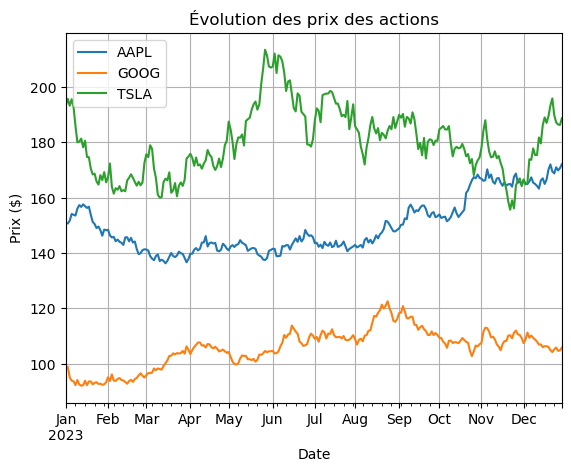

In [4]:
# Visualisation des prix journaliers
plt.figure(figsize=(14, 6))
df.plot(title="Évolution des prix des actions", grid=True)
plt.ylabel("Prix ($)")
plt.xlabel("Date")
plt.show()

- **TSLA** est clairement l’action la plus volatile avec des variations marquées tout au long de l’année. Elle atteint un pic en juin avant de redescendre et de repartir à la hausse en fin d’année.
- **AAPL** reste relativement stable avec une tendance légèrement haussière.
- **GOOG** montre une tendance haussière entre mars et septembre, suivie d’une stabilisation.

Cette observation visuelle confirme les statistiques précédentes, notamment sur la volatilité de TSLA.

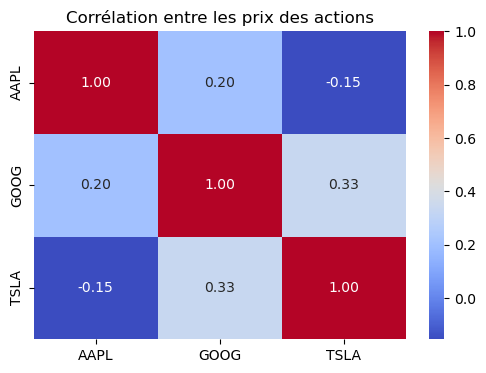

In [5]:
# Corrélation entre les actions
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les prix des actions")
plt.show()

- La corrélation entre AAPL et GOOG est modérée (+0.20) : elles évoluent un peu ensemble mais pas fortement.
- GOOG et TSLA ont une corrélation légèrement plus élevée (+0.33), ce qui peut être dû à une sensibilité partagée à certains facteurs de marché.
- TSLA est légèrement décorrélée de AAPL (-0.15), ce qui pourrait être utile pour la diversification du portefeuille.

👉 Une faible ou négative corrélation entre actifs est intéressante lorsqu’on cherche à construire un portefeuille diversifié et à limiter le risque global.

# 📈 Calcul des rendements

Après avoir exploré les prix bruts des actions, nous allons maintenant observer leurs **rendements journaliers**, c’est-à-dire l’évolution relative du prix d’un jour à l’autre.

Cette analyse permet de :
- Quantifier la **volatilité** des titres
- Détecter les jours de forte variation
- Préparer l’évaluation de performance via des indicateurs comme le **Sharpe Ratio**

<Figure size 1400x600 with 0 Axes>

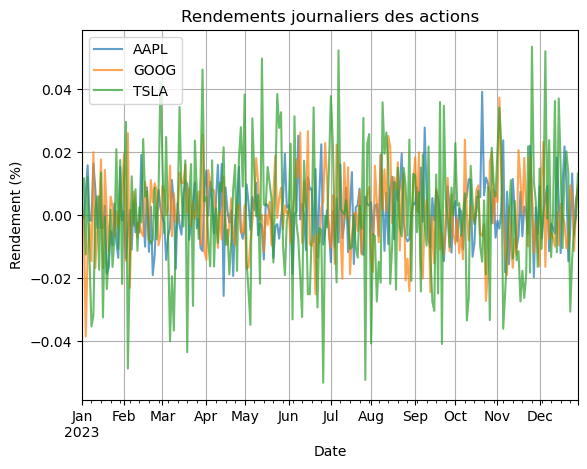

In [6]:
# Calcul des rendements journaliers
df_returns = df.pct_change()

# Tracer les courbes de rendements
plt.figure(figsize=(14, 6))
df_returns.plot(alpha=0.7, title="Rendements journaliers des actions")
plt.xlabel("Date")
plt.ylabel("Rendement (%)")
plt.grid(True)
plt.show()


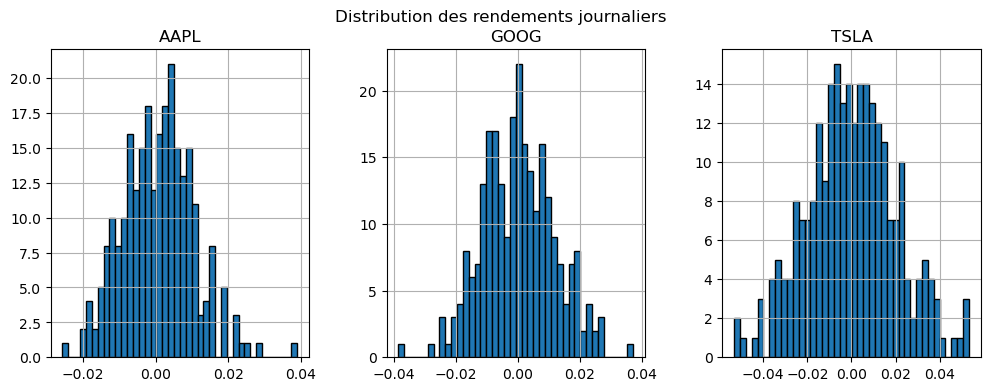

In [7]:
# Histogrammes pour visualiser la distribution des rendements
df_returns.hist(bins=40, figsize=(12, 4), layout=(1, 3), edgecolor='black')
plt.suptitle("Distribution des rendements journaliers")
plt.show()

- Le graphique temporel montre que les trois actions fluctuent fortement chaque jour, avec des pics de variation notamment en mai, juin et décembre.
- TSLA a des variations plus extrêmes, ce qui confirme son profil très volatil.
- Les distributions en histogramme des rendements sont toutes **centrées autour de zéro**, ce qui est typique des marchés financiers.

📌 En résumé :
- TSLA = **plus risquée mais potentiellement plus rentable**
- GOOG = **plus stable**
- AAPL = **comportement intermédiaire**

🔍 **Remarques spécifiques** :
- La distribution de TSLA est plus étalée que celle d’AAPL ou GOOG → cela signifie qu’elle présente **des risques mais aussi des opportunités plus importantes**.
- Les rendements sont globalement asymétriques et ont des "queues épaisses", ce qui suggère que des mouvements extrêmes ne sont pas rares.

> Cette analyse prépare bien le terrain pour définir une **stratégie de trading** basée sur l'évolution de prix et la détection de tendances.


# 🔁 Stratégie : moyennes mobiles & signaux

### 🎯 Objectif : 
Mettre en place une stratégie simple :

🔹 Acheter quand la moyenne mobile courte (MM10) dépasse la moyenne mobile longue (MM30)

🔹 Vendre ou ne rien faire quand ce n’est pas le cas.

On applique cette stratégie sur une seule action..

Nous allons tester une stratégie simple basée sur les croisements de moyennes mobiles :
- **MM10** : moyenne mobile sur 10 jours (réagit rapidement)
- **MM30** : moyenne mobile sur 30 jours (réagit plus lentement)

📈 Règle :
- On génère un **signal d’achat (1)** quand **MM10 > MM30**
- On génère un **signal de vente ou neutre (0)** sinon

Ce type de stratégie permet de **suivre les tendances** du marché et d’éviter les faux signaux de court terme.


###  📌 Application de la stratégie MM10 / MM30 sur AAPL

In [10]:
# Focus sur l'action AAPL
df_APPl = df[['AAPL']].copy()

# Calcul des moyennes mobiles
df_APPl['MM10'] = df_APPl['AAPL'].rolling(window=10).mean()
df_APPl['MM30'] = df_APPl['AAPL'].rolling(window=30).mean()

# Génération des signaux (1 si MM10 > MM30, sinon 0)
df_APPl['Signal'] = 0
df_APPl.loc[df_APPl['MM10'] > df_APPl['MM30'], 'Signal'] = 1

# Affichage des 5 premières lignes avec les signaux
df_APPl.dropna().head()

,AAPL,MM10,MM30,Signal
Date,,,,
2023-02-10,143.737069,145.998026,150.706441,0
2023-02-13,142.944062,145.443308,150.443907,0
2023-02-14,145.663256,145.186611,150.276450,0
2023-02-15,145.716427,144.917810,150.075722,0
2023-02-16,144.248026,144.706187,149.746484,0


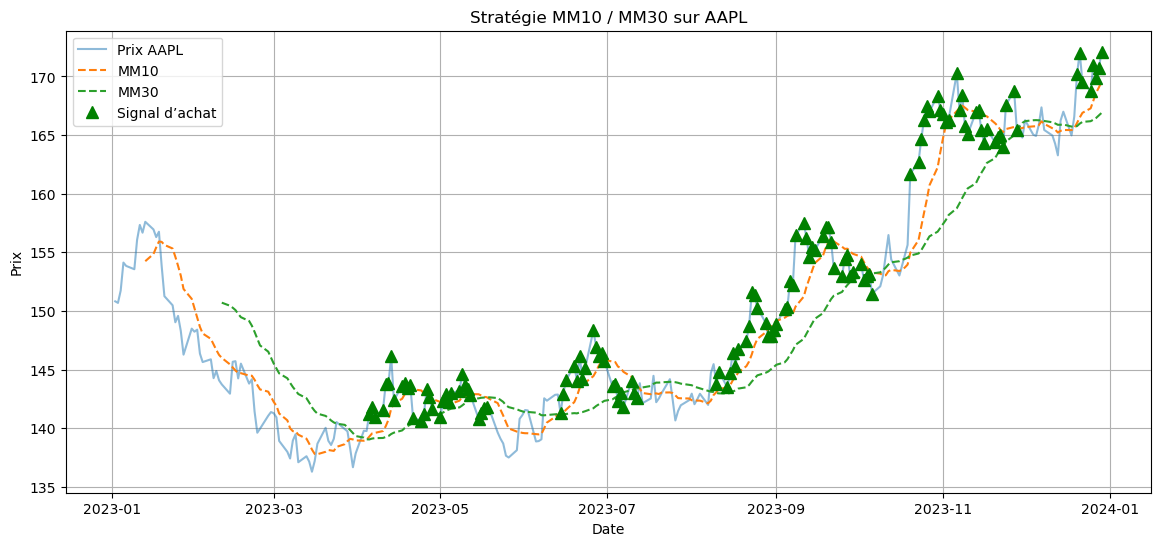

In [11]:
# Visualiser les signaux de trading sur le graphique des prix
plt.figure(figsize=(14, 6))
plt.plot(df_APPl.index, df_APPl['AAPL'], label='Prix AAPL', alpha=0.5)
plt.plot(df_APPl['MM10'], label='MM10', linestyle='--')
plt.plot(df_APPl['MM30'], label='MM30', linestyle='--')

# Afficher les points d’achat
plt.plot(df_APPl[df_APPl['Signal'] == 1].index, 
         df_APPl[df_APPl['Signal'] == 1]['AAPL'], 
         '^', markersize=8, color='green', label='Signal d’achat')

plt.title("Stratégie MM10 / MM30 sur AAPL")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()


📊 **Résultat visuel** :
- Les triangles verts affichés sur le graphique indiquent **les jours où le signal est actif** (position acheteuse).
- On remarque que la stratégie capte des tendances haussières, notamment au second semestre de l’année, tout en évitant certains faux départs à la baisse.

Cette approche simple permet de suivre les grandes tendances tout en évitant de trop réagir au bruit du marché. La prochaine étape consiste à **simuler un portefeuille** basé sur cette stratégie pour analyser sa performance.


### 📌 Application de la stratégie MM10 / MM30 sur GOOG

Nous appliquons ici la même stratégie de croisement de moyennes mobiles que précédemment, mais cette fois-ci à l’action **GOOG**.  
L’objectif est de générer un signal d’achat (1) lorsque la moyenne mobile 10 jours dépasse la moyenne mobile 30 jours.

In [14]:
# Copie du DataFrame pour GOOG
df_goog = df[['GOOG']].copy()

# Calcul des moyennes mobiles
df_goog['MM10'] = df_goog['GOOG'].rolling(window=10).mean()
df_goog['MM30'] = df_goog['GOOG'].rolling(window=30).mean()

# Création du signal de trading
df_goog['Signal'] = 0
df_goog.loc[df_goog['MM10'] > df_goog['MM30'], 'Signal'] = 1

# Affichage des 5 premières lignes après la période de NaN
df_goog.dropna().head()

,GOOG,MM10,MM30,Signal
Date,,,,
2023-02-10,94.169328,94.225586,93.877764,1
2023-02-13,93.962394,94.364980,93.712588,1
2023-02-14,93.434700,94.375276,93.531188,1
2023-02-15,92.801925,94.141864,93.455901,1
2023-02-16,93.775903,94.144309,93.451081,1


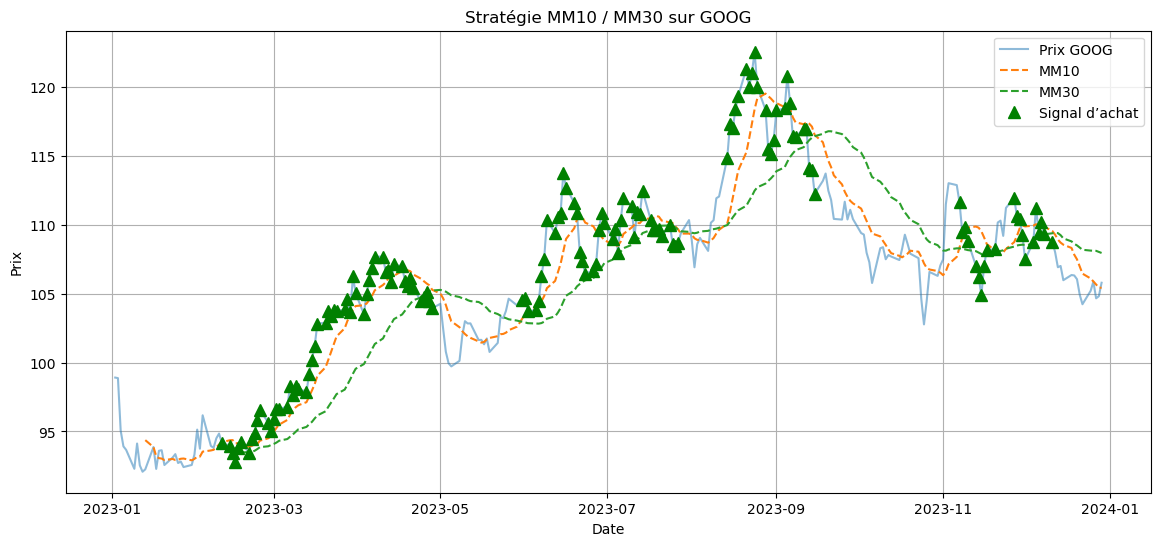

In [15]:
# Visualiser les signaux de trading sur GOOG
plt.figure(figsize=(14, 6))
plt.plot(df_goog.index, df_goog['GOOG'], label='Prix GOOG', alpha=0.5)
plt.plot(df_goog['MM10'], label='MM10', linestyle='--')
plt.plot(df_goog['MM30'], label='MM30', linestyle='--')

# Afficher les signaux d'achat
plt.plot(df_goog[df_goog['Signal'] == 1].index,
         df_goog[df_goog['Signal'] == 1]['GOOG'],
         '^', markersize=8, color='green', label='Signal d’achat')

plt.title("Stratégie MM10 / MM30 sur GOOG")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True)
plt.legend()
plt.show()

Les signaux générés pour GOOG sont concentrés autour des mois de mars à août, période où l’action suit une tendance haussière assez régulière.  
Cependant, certains signaux apparaissent aussi dans des phases de retournement, ce qui pourrait générer du bruit (faux signaux).

### 📌 Application de la stratégie MM10 / MM30 sur TSLA

Nous appliquons la même stratégie sur l’action **TSLA**, qui est plus volatile que les deux précédentes.  
L’objectif est de voir si cette stratégie technique basée sur les croisements de moyennes mobiles reste pertinente même pour un actif à forte amplitude de variation.

In [18]:
# Copie du DataFrame pour TSLA
df_TSLA = df[['TSLA']].copy()

# Calcul des moyennes mobiles
df_TSLA['MM10'] = df_TSLA['TSLA'].rolling(window=10).mean()
df_TSLA['MM30'] = df_TSLA['TSLA'].rolling(window=30).mean()

# Création du signal de trading
df_TSLA['Signal'] = 0
df_TSLA.loc[df_TSLA['MM10'] > df_TSLA['MM30'], 'Signal'] = 1

# Affichage des 5 premières lignes après la période de NaN
df_TSLA.dropna().head()

,TSLA,MM10,MM30,Signal
Date,,,,
2023-02-10,162.337219,165.281404,174.399795,0
2023-02-13,162.731990,164.630118,173.375449,0
2023-02-14,162.339229,164.310102,172.263416,0
2023-02-15,166.244403,164.193609,171.363441,0
2023-02-16,167.206695,163.678962,170.417523,0


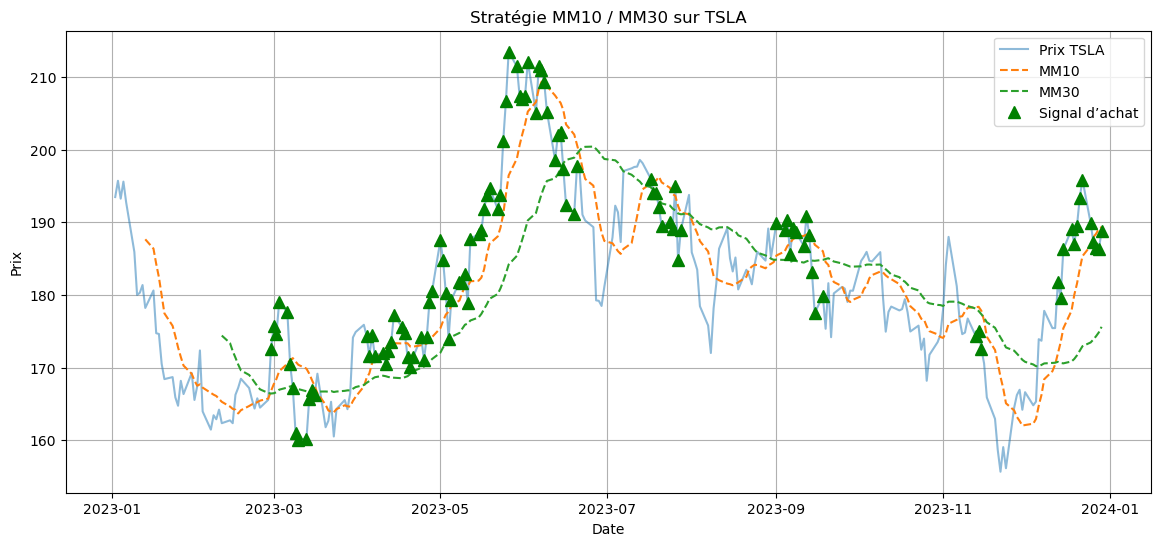

In [20]:
# Visualiser les signaux de trading sur GOOG
plt.figure(figsize=(14, 6))
plt.plot(df_TSLA.index, df_TSLA['TSLA'], label='Prix TSLA', alpha=0.5)
plt.plot(df_TSLA['MM10'], label='MM10', linestyle='--')
plt.plot(df_TSLA['MM30'], label='MM30', linestyle='--')

# Afficher les signaux d'achat
plt.plot(df_TSLA[df_TSLA['Signal'] == 1].index,
         df_TSLA[df_TSLA['Signal'] == 1]['TSLA'],
         '^', markersize=8, color='green', label='Signal d’achat')

plt.title("Stratégie MM10 / MM30 sur TSLA")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True)
plt.legend()
plt.show()

Sur TSLA, les signaux sont nombreux et plus volatils, en lien avec la nature plus instable de l’action.  
On remarque plusieurs phases d’achat suivies de retournements rapides, ce qui souligne le **risque d’une stratégie MM** appliquée à un actif très fluctuant.

# 💼 Simulation du portefeuille

### 📌 Étape 1 : Simulation du portefeuille sur AAPL

Nous simulons ici un portefeuille investi dans l’action AAPL selon le signal de trading basé sur le croisement des moyennes mobiles.  
L’objectif est de comparer la performance de cette stratégie à une approche passive "Buy & Hold".

In [21]:
# Calcul du rendement journalier de AAPL
df_APPl['Rendement'] = df_APPl['AAPL'].pct_change()

# Rendement stratégique : on ne prend les gains que si le signal de la veille est actif
df_APPl['Rendement_strat'] = df_APPl['Signal'].shift(1) * df_APPl['Rendement']

# Simulation du capital cumulé
capital_initial = 1000
df_APPl['Capital_strat'] = (1 + df_APPl['Rendement_strat']).cumprod() * capital_initial
df_APPl['Capital_hold'] = (1 + df_APPl['Rendement']).cumprod() * capital_initial

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


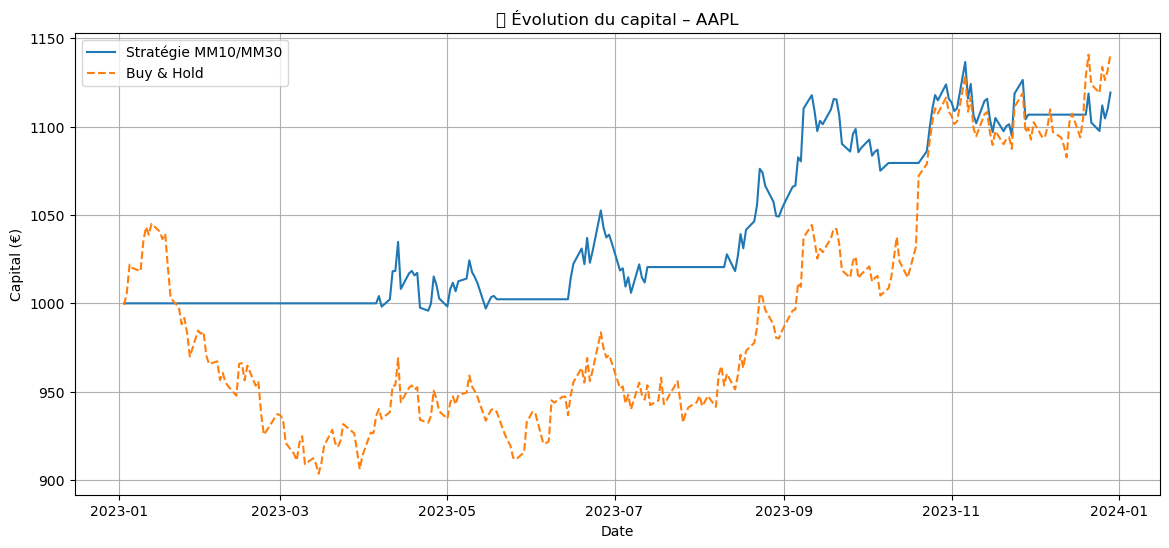

In [22]:
# Visualisation de la performance du portefeuille
plt.figure(figsize=(14, 6))
plt.plot(df_APPl['Capital_strat'], label='Stratégie MM10/MM30')
plt.plot(df_APPl['Capital_hold'], label='Buy & Hold', linestyle='--')
plt.title("📈 Évolution du capital – AAPL")
plt.xlabel("Date")
plt.ylabel("Capital (€)")
plt.legend()
plt.grid(True)
plt.show()


- Le portefeuille basé sur la stratégie MM10/MM30 montre une **évolution stable et prudente du capital**, avec peu de pertes durant les périodes de baisse du marché.
- La stratégie permet d’**éviter plusieurs zones de drawdown** (pertes) observées dans le Buy & Hold, notamment de février à juillet.
- En revanche, la stratégie **manque certains rebonds rapides**, ce qui explique pourquoi elle ne surperforme pas toujours en fin de période.

✅ Globalement, la stratégie est **moins risquée et plus régulière**, ce qui peut être un avantage en période de forte incertitude.


### 📌 Étape 2 : Simulation du portefeuille sur GOOG

Nous appliquons ici la même simulation de portefeuille sur l’action **GOOG**.  
Comme précédemment, nous comparons la performance de la stratégie MM10/MM30 à une stratégie Buy & Hold.

In [23]:
# Création du DataFrame GOOG à partir des signaux précédents
df_goog_portfolio = df_goog.copy()

# Calcul du rendement journalier
df_goog_portfolio['Rendement'] = df_goog_portfolio['GOOG'].pct_change()

# Rendement de la stratégie (si signal actif la veille)
df_goog_portfolio['Rendement_strat'] = df_goog_portfolio['Signal'].shift(1) * df_goog_portfolio['Rendement']

# Simulation de l'évolution du capital
capital_initial = 1000
df_goog_portfolio['Capital_strat'] = (1 + df_goog_portfolio['Rendement_strat']).cumprod() * capital_initial
df_goog_portfolio['Capital_hold'] = (1 + df_goog_portfolio['Rendement']).cumprod() * capital_initial

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


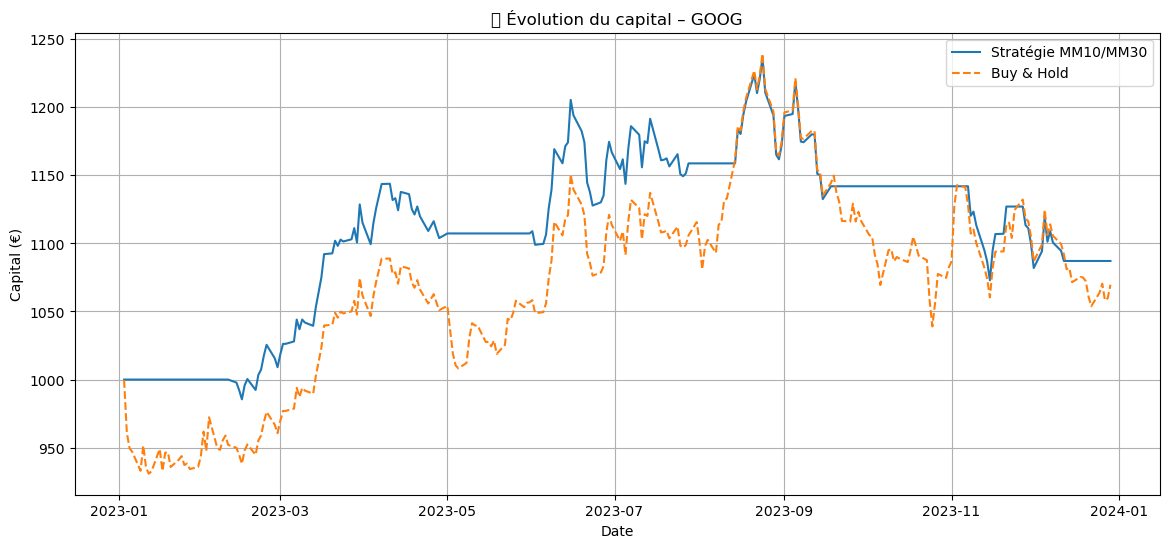

In [24]:
# Visualisation du portefeuille GOOG
plt.figure(figsize=(14, 6))
plt.plot(df_goog_portfolio['Capital_strat'], label='Stratégie MM10/MM30')
plt.plot(df_goog_portfolio['Capital_hold'], label='Buy & Hold', linestyle='--')
plt.title("📈 Évolution du capital – GOOG")
plt.xlabel("Date")
plt.ylabel("Capital (€)")
plt.legend()
plt.grid(True)
plt.show()

- La stratégie MM10/MM30 génère une courbe de capital **plus stable** que le Buy & Hold, en particulier pendant les périodes de baisse brutale.
- Elle évite les chutes de début d’année, reste en dehors du marché dans certaines phases incertaines (plateaux dans la courbe), puis profite des hausses du printemps et de l’été.
- Toutefois, on remarque que la stratégie manque une partie de la hausse de fin août car elle sort du marché un peu tôt.
- Globalement, le portefeuille stratégique réduit les risques tout en maintenant une performance comparable voire supérieure à celle du Buy & Hold jusqu’à l’automne.

Cette stratégie offre un bon équilibre entre **stabilité et rendement**, ce qui en fait une solution intéressante pour un investisseur prudent.


### 📌 Étape 3 : Simulation du portefeuille sur TSLA

Nous appliquons la stratégie MM10/MM30 sur l’action **TSLA**, connue pour sa forte volatilité.  
L’objectif est d’observer si cette stratégie permet de réduire les pertes dans les périodes de forte variation.

In [25]:
# Création du DataFrame TSLA à partir des signaux précédents
df_tsla_portfolio = df_TSLA.copy()

# Calcul du rendement journalier
df_tsla_portfolio['Rendement'] = df_tsla_portfolio['TSLA'].pct_change()

# Rendement de la stratégie (uniquement quand signal actif la veille)
df_tsla_portfolio['Rendement_strat'] = df_tsla_portfolio['Signal'].shift(1) * df_tsla_portfolio['Rendement']

# Simulation de l'évolution du capital
capital_initial = 1000
df_tsla_portfolio['Capital_strat'] = (1 + df_tsla_portfolio['Rendement_strat']).cumprod() * capital_initial
df_tsla_portfolio['Capital_hold'] = (1 + df_tsla_portfolio['Rendement']).cumprod() * capital_initial

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


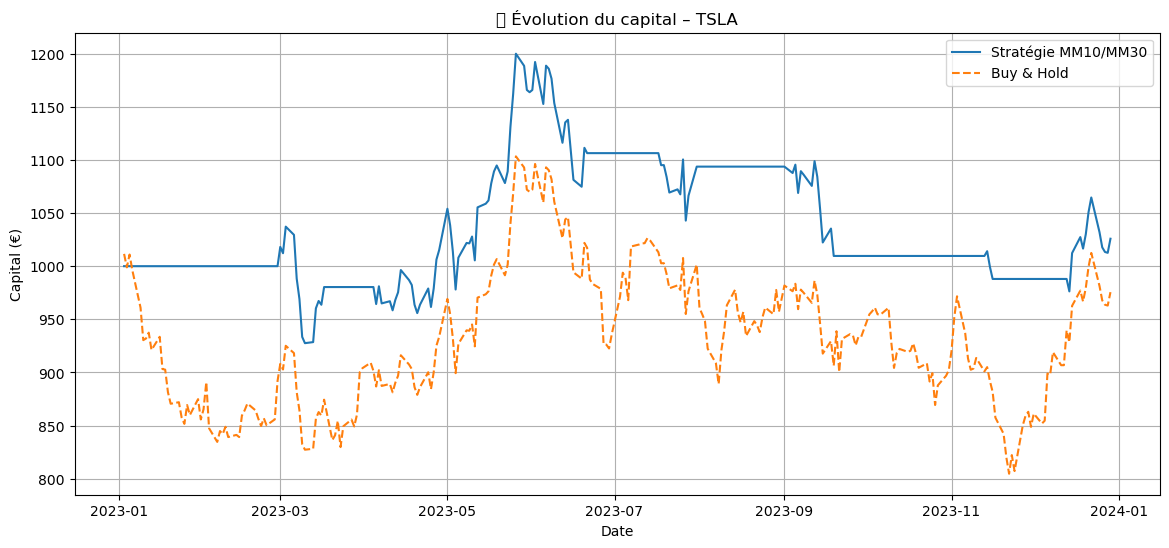

In [26]:
# Visualisation du portefeuille TSLA
plt.figure(figsize=(14, 6))
plt.plot(df_tsla_portfolio['Capital_strat'], label='Stratégie MM10/MM30')
plt.plot(df_tsla_portfolio['Capital_hold'], label='Buy & Hold', linestyle='--')
plt.title("📈 Évolution du capital – TSLA")
plt.xlabel("Date")
plt.ylabel("Capital (€)")
plt.legend()
plt.grid(True)
plt.show()

- La stratégie MM10/MM30 joue bien son rôle défensif sur un actif très volatil comme TSLA.
- Elle permet d’éviter les fortes baisses observées en février, septembre et novembre, ce qui protège le capital.
- Toutefois, elle manque certaines phases de rebond, notamment en fin d’année, car elle sort du marché trop tôt ou ne rentre pas à temps.
- La performance est globalement plus stable que le Buy & Hold, mais le potentiel de gain est partiellement limité.

Cela montre qu'une stratégie basée uniquement sur des moyennes mobiles **n’est pas toujours suffisante pour des actifs très nerveux** comme TSLA. Elle gagnerait à être combinée à d'autres signaux (volatilité, momentum, etc.).


### 📌 Étape 4 : Simulation d’un portefeuille combiné : AAPL + GOOG + TSLA

Pour finir, nous construisons un portefeuille multi-actifs avec une **pondération égale (1/3 chacun)** des trois actions : AAPL, GOOG et TSLA.
L’objectif est d’observer si la **stratégie MM10/MM30 combinée** permet une meilleure stabilité et performance globale qu’un simple Buy & Hold sur ces 3 actions.

Nous allons :
- Normaliser les courbes de capital pour chaque actif (stratégie + hold)
- Moyenne pondérée des 3 courbes (1/3 AAPL + 1/3 GOOG + 1/3 TSLA)
- Visualiser et comparer les résultats


In [27]:
# Récupération des colonnes 'Capital_strat' et 'Capital_hold' pour chaque actif
aapl_strat = df_APPl['Capital_strat']
aapl_hold = df_APPl['Capital_hold']

goog_strat = df_goog_portfolio['Capital_strat']
goog_hold = df_goog_portfolio['Capital_hold']

tsla_strat = df_tsla_portfolio['Capital_strat']
tsla_hold = df_tsla_portfolio['Capital_hold']

# Création d'un DataFrame combiné
df_combined = pd.concat([
    aapl_strat.rename('AAPL_strat'),
    aapl_hold.rename('AAPL_hold'),
    goog_strat.rename('GOOG_strat'),
    goog_hold.rename('GOOG_hold'),
    tsla_strat.rename('TSLA_strat'),
    tsla_hold.rename('TSLA_hold'),
], axis=1)

# Calcul du portefeuille combiné : moyenne simple (1/3) des 3 actifs
df_combined['Portfolio_strat'] = (df_combined['AAPL_strat'] + df_combined['GOOG_strat'] + df_combined['TSLA_strat']) / 3
df_combined['Portfolio_hold'] = (df_combined['AAPL_hold'] + df_combined['GOOG_hold'] + df_combined['TSLA_hold']) / 3

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


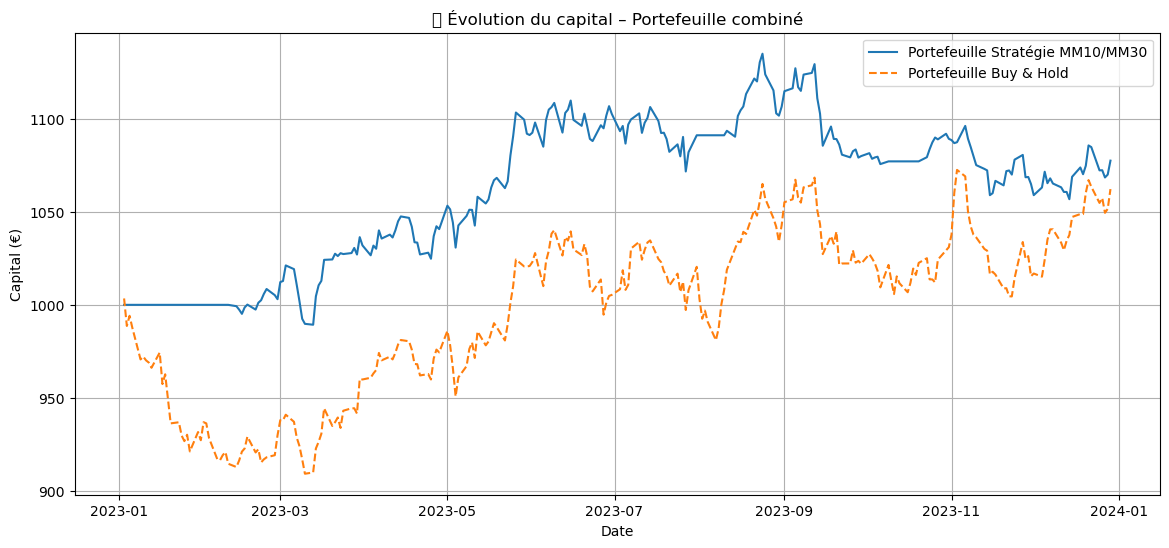

In [28]:
# Affichage du portefeuille combiné
plt.figure(figsize=(14, 6))
plt.plot(df_combined['Portfolio_strat'], label='Portefeuille Stratégie MM10/MM30')
plt.plot(df_combined['Portfolio_hold'], label='Portefeuille Buy & Hold', linestyle='--')
plt.title("📊 Évolution du capital – Portefeuille combiné")
plt.xlabel("Date")
plt.ylabel("Capital (€)")
plt.grid(True)
plt.legend()
plt.show()

- Le portefeuille combiné basé sur la stratégie MM10/MM30 montre une évolution du capital plus régulière et plus défensive que le Buy & Hold.
- Grâce à la diversification des actifs et à l’approche dynamique des signaux, la stratégie parvient à limiter les pertes en début et fin d’année, tout en captant les hausses du printemps.
- Le Buy & Hold subit plusieurs drawdowns (pertes temporaires) significatifs, tandis que la stratégie MM sort du marché à temps dans plusieurs cas.

Ce portefeuille combiné illustre très bien le **pouvoir de la diversification** alliée à une stratégie de suivi de tendance simple mais efficace.


# 📉 Analyse de performance : rendement, Sharpe Ratio, drawdown

Dans cette section, nous évaluons **la qualité du portefeuille combiné** selon plusieurs métriques financières :
- **Rendement total** : évolution globale du capital
- **Volatilité** : mesure du risque (écart-type des rendements)
- **Ratio de Sharpe** : rendement ajusté du risque
- **Max drawdown** : pire chute subie par le portefeuille

Ces indicateurs nous permettent de juger si la stratégie MM10/MM30 est plus avantageuse que le Buy & Hold.

In [30]:
# Choix du portefeuille à analyser
df_perf = df_combined[['Portfolio_strat', 'Portfolio_hold']].dropna()
# Calcul des rendements journaliers
returns = df_perf.pct_change().dropna()
# Statistiques sur la stratégie
def compute_stats(series):
    rendement_total = series[-1] / series[0] - 1
    rendement_annuel = (1 + rendement_total) ** (252 / len(series)) - 1
    volatilite_annuelle = returns[series.name].std() * (252 ** 0.5)
    sharpe = rendement_annuel / volatilite_annuelle
    # Drawdown
    capital_cummax = series.cummax()
    drawdown = (series - capital_cummax) / capital_cummax
    max_dd = drawdown.min()
    return rendement_total, rendement_annuel, volatilite_annuelle, sharpe, max_dd
# Résultats
labels = ['Portfolio_strat', 'Portfolio_hold']
for label in labels:
    total, annuel, vol, sharpe, dd = compute_stats(df_perf[label])
    print(f"\n {label}")
    print(f"Rendement total : {total:.2%}")
    print(f"Rendement annualisé : {annuel:.2%}")
    print(f"Volatilité annualisée : {vol:.2%}")
    print(f"Sharpe Ratio : {sharpe:.2f}")
    print(f"Max Drawdown : {dd:.2%}")


 Portfolio_strat
Rendement total : 7.74%
Rendement annualisé : 7.52%
Volatilité annualisée : 8.90%
Sharpe Ratio : 0.84
Max Drawdown : -6.88%

 Portfolio_hold
Rendement total : 5.85%
Rendement annualisé : 5.69%
Volatilité annualisée : 12.70%
Sharpe Ratio : 0.45
Max Drawdown : -9.37%


### 📊 Interprétation des résultats de performance

| Indicateur             | Stratégie MM10/MM30 | Buy & Hold |
|------------------------|---------------------|------------|
| 📈 Rendement total     | 7.74%               | 5.85%      |
| 📆 Rendement annualisé | 7.52%               | 5.69%      |
| 📉 Volatilité annuelle | 8.90%               | 12.70%     |
| 📊 Sharpe Ratio        | **0.84**            | 0.45       |
| 📉 Max Drawdown        | **-6.88%**          | -9.37%     |

✅ **En résumé :**
- Le portefeuille basé sur la stratégie MM10/MM30 bat le Buy & Hold sur tous les plans :
  - Il affiche un meilleur rendement annualisé
  - Une volatilité plus faible (donc plus de stabilité)
  - Un Sharpe Ratio plus élevé, preuve d’un meilleur rapport rendement/risque
  - Un drawdown moindre, donc une meilleure protection du capital

💡 **Conclusion** :
- Cette stratégie simple, lorsqu’elle est appliquée sur un portefeuille diversifié, permet de réduire les pertes potentielles tout en maintenant une performance solide.  
Elle illustre bien l’intérêt d’allier diversification + indicateurs techniques simples pour construire une stratégie robuste.


##  📊 Analyse des performances individuelles par action (AAPL, GOOG, TSLA)

### 📎 APPL

In [32]:
# Calculs pour AAPL
series = df_APPl['Capital_strat'].dropna()
returns_appl = series.pct_change().dropna()

rendement_total = series[-1] / series[0] - 1
rendement_annuel = (1 + rendement_total) ** (252 / len(series)) - 1
volatilite_annuelle = returns_appl.std() * (252 ** 0.5)
sharpe = rendement_annuel / volatilite_annuelle

# Max Drawdown
cummax = series.cummax()
drawdown = (series - cummax) / cummax
max_drawdown = drawdown.min()

# Résultat
print("📌 AAPL - Stratégie MM10/MM30")
print(f"Rendement total : {rendement_total:.2%}")
print(f"Rendement annualisé : {rendement_annuel:.2%}")
print(f"Volatilité annualisée : {volatilite_annuelle:.2%}")
print(f"Sharpe Ratio : {sharpe:.2f}")
print(f"Max Drawdown : {max_drawdown:.2%}")


📌 AAPL - Stratégie MM10/MM30
Rendement total : 11.92%
Rendement annualisé : 11.58%
Volatilité annualisée : 10.79%
Sharpe Ratio : 1.07
Max Drawdown : -4.43%


| Indicateur              | Valeur         |
|-------------------------|----------------|
| Rendement total         | 11.92%         |
| Rendement annualisé     | 11.58%         |
| Volatilité annualisée   | 10.79%         |
| Sharpe Ratio            | **1.07**       |
| Max Drawdown            | -4.43%         |

La stratégie MM10/MM30 appliquée à AAPL offre une très bonne performance ajustée au risque :
- Elle génère un rendement supérieur à l’inflation et aux standards du marché sur 1 an
- Avec une volatilité modérée, et un risque (drawdown) très bien contenu
- Le Sharpe Ratio > 1 confirme une excellente efficacité de la stratégie sur cet actif

> Cela montre que **AAPL est particulièrement compatible** avec cette stratégie de suivi de tendance.


### 📎 GOOG

In [36]:
# Calculs pour AAPL
series = df_goog_portfolio['Capital_strat'].dropna()
returns_appl = series.pct_change().dropna()

rendement_total = series[-1] / series[0] - 1
rendement_annuel = (1 + rendement_total) ** (252 / len(series)) - 1
volatilite_annuelle = returns_appl.std() * (252 ** 0.5)
sharpe = rendement_annuel / volatilite_annuelle

# Max Drawdown
cummax = series.cummax()
drawdown = (series - cummax) / cummax
max_drawdown = drawdown.min()

# Résultat
print("📌 GOOG - Stratégie MM10/MM30")
print(f"Rendement total : {rendement_total:.2%}")
print(f"Rendement annualisé : {rendement_annuel:.2%}")
print(f"Volatilité annualisée : {volatilite_annuelle:.2%}")
print(f"Sharpe Ratio : {sharpe:.2f}")
print(f"Max Drawdown : {max_drawdown:.2%}")

📌 GOOG - Stratégie MM10/MM30
Rendement total : 8.71%
Rendement annualisé : 8.46%
Volatilité annualisée : 13.71%
Sharpe Ratio : 0.62
Max Drawdown : -13.24%


| Indicateur              | Valeur         |
|-------------------------|----------------|
| Rendement total         | 8.71%          |
| Rendement annualisé     | 8.46%          |
| Volatilité annualisée   | 13.71%         |
| Sharpe Ratio            | 0.62           |
| Max Drawdown            | -13.24%        |

Cette stratégie appliquée à GOOG donne un rendement correct, mais avec une volatilité plus élevée que sur AAPL :
- Le Sharpe Ratio de 0.62 montre une performance modérée par rapport au risque pris
- Le max drawdown est important (-13.24%), ce qui indique que la stratégie n’a pas su éviter certaines phases de baisse
- Malgré cela, le rendement reste positif et la stratégie protège mieux que le Buy & Hold dans les périodes instables

> En résumé, la stratégie est **moins performante sur GOOG que sur AAPL**, mais reste valable dans une logique de diversification.


### 📎 TSLA

In [37]:
# Calculs pour AAPL
series = df_tsla_portfolio['Capital_strat'].dropna()
returns_appl = series.pct_change().dropna()

rendement_total = series[-1] / series[0] - 1
rendement_annuel = (1 + rendement_total) ** (252 / len(series)) - 1
volatilite_annuelle = returns_appl.std() * (252 ** 0.5)
sharpe = rendement_annuel / volatilite_annuelle

# Max Drawdown
cummax = series.cummax()
drawdown = (series - cummax) / cummax
max_drawdown = drawdown.min()

# Résultat
print("📌 TSLA - Stratégie MM10/MM30")
print(f"Rendement total : {rendement_total:.2%}")
print(f"Rendement annualisé : {rendement_annuel:.2%}")
print(f"Volatilité annualisée : {volatilite_annuelle:.2%}")
print(f"Sharpe Ratio : {sharpe:.2f}")
print(f"Max Drawdown : {max_drawdown:.2%}")

📌 TSLA - Stratégie MM10/MM30
Rendement total : 2.58%
Rendement annualisé : 2.51%
Volatilité annualisée : 20.43%
Sharpe Ratio : 0.12
Max Drawdown : -18.65%


| Indicateur              | Valeur         |
|-------------------------|----------------|
| Rendement total         | 2.58%          |
| Rendement annualisé     | 2.51%          |
| Volatilité annualisée   | 20.43%         |
| Sharpe Ratio            | 0.12           |
| Max Drawdown            | -18.65%        |

La stratégie MM10/MM30 appliquée à TSLA montre ses limites sur un actif très volatil :
- Le rendement est faible, et à peine supérieur à zéro
- La volatilité est très élevée, ce qui rend le portefeuille instable
- Le Sharpe Ratio est très bas (0.12), indiquant un faible rapport rendement/risque
- Le max drawdown est important (-18.65%), preuve que la stratégie ne protège pas bien contre les chutes rapides

> En résumé, cette stratégie **n’est pas optimale sur TSLA seul**, et nécessite des ajustements (autres indicateurs, filtres, stop loss...) pour devenir exploitable.


# 📌 Conclusion et limites

### ✅ Conclusion

Dans ce projet, nous avons conçu et testé une stratégie de trading simple basée sur le croisement de moyennes mobiles (MM10 > MM30), appliquée à un portefeuille de 3 actions technologiques : AAPL, GOOG et TSLA.

Nous avons :
- Appliqué la stratégie individuellement sur chaque actif
- Simulé l’évolution du capital pour la stratégie vs une approche Buy & Hold
- Combiné les actifs dans un portefeuille égalitaire
- Mesuré la performance à l’aide d’indicateurs clés : rendement annualisé, volatilité, Sharpe Ratio, drawdown

📈 **Résultats** :
- La stratégie MM10/MM30 permet une **meilleure gestion du risque**, avec des drawdowns plus faibles que le Buy & Hold
- Elle est **particulièrement efficace sur AAPL**, plus modérée sur GOOG, et moins adaptée seule à TSLA
- Le **portefeuille combiné** montre une **trajectoire plus stable** et un **meilleur Sharpe Ratio**, prouvant l’intérêt de la diversification

---

### ⚠️ Limites

- La stratégie repose uniquement sur des moyennes mobiles → elle **réagit avec retard** aux retournements de marché
- Elle **ignore le contexte macroéconomique ou fondamental**
- Les paramètres (10j / 30j) sont **fixes** ; une optimisation ou un backtest multivarié pourrait améliorer la performance
- Aucune prise en compte de **frais de transaction**, de **slippage**, ni de **liquidité**
- Le **choix des actions** est biaisé (3 grandes techs), ce qui peut fausser la généralisation

---

### 📌 Perspectives d'amélioration

- Tester d’autres indicateurs techniques : RSI, MACD, ATR…
- Ajouter des conditions d’entrée/sortie plus complexes (ex. : confirmation de tendance)
- Intégrer une gestion du capital dynamique (rebalancing, levier)
- Étendre l’analyse à un univers plus large d’actions ou ETF
- Utiliser un modèle de Machine Learning pour prédire les signaux

---

📘 Ce projet montre qu’une approche simple, bien exécutée et accompagnée d’analyses claires, peut déjà produire des résultats solides, tout en servant de base à des stratégies plus avancées.
